## Problem3

A certain organization wants an early estimate of their employee churn out rate. So the HR department gathered the data regarding the employee’s salary hike and the churn out rate in a financial year. The analytics team will have to perform an analysis and predict an estimate of employee churn based on the salary hike. Build a Simple Linear Regression model with churn out rate as the target variable. Apply necessary transformations and record the RMSE and correlation coefficient values for different models.

In [2]:
# Importing necessary libraries
import pandas as pd # deals with data frame  
import numpy as np  # deals with numerical values

dt = pd.read_csv("emp_data.csv")

# Exploratory data analysis:
# 1. Measures of central tendency
# 2. Measures of dispersion
# 3. Third moment business decision
# 4. Fourth moment business decision
# 5. Probability distributions of variables 
# 6. Graphical representations (Histogram, Box plot, Dot plot, Stem & Leaf plot, Bar plot, etc.)

dt.describe()



,Salary_hike,Churn_out_rate
count,10.000000,10.000000
mean,1688.600000,72.900000
std,92.096809,10.257247
min,1580.000000,60.000000
25%,1617.500000,65.750000
50%,1675.000000,71.000000
75%,1724.000000,78.750000
max,1870.000000,92.000000


In [3]:
dt.shape

(10, 2)

In [4]:
dt.head()

,Salary_hike,Churn_out_rate
0,1580,92
1,1600,85
2,1610,80
3,1640,75
4,1660,72


<AxesSubplot:xlabel='Churn_out_rate', ylabel='Density'>

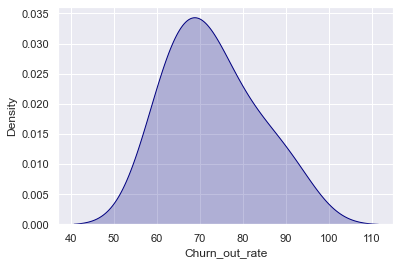

In [5]:
#Graphical Representation
import matplotlib.pyplot as plt # mostly used for visualization purposes
import seaborn as sns
sns.set()

#plt.bar(height = dt['Churn_out_rate'], x = np.arange(100, 1100, 100))

sns.kdeplot(data=dt,x= dt['Churn_out_rate'],fill=True,color="navy")

(array([2., 1., 1., 2., 1., 0., 1., 1., 0., 1.]),
 array([60. , 63.2, 66.4, 69.6, 72.8, 76. , 79.2, 82.4, 85.6, 88.8, 92. ]),
 <BarContainer object of 10 artists>)

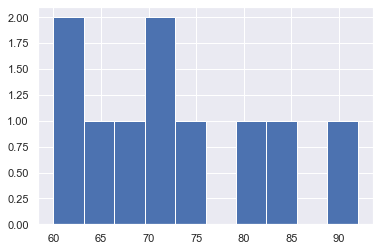

In [6]:
plt.hist(dt['Churn_out_rate']) #histogram

{'whiskers': [<matplotlib.lines.Line2D at 0x2ac1bf1b520>,
 'caps': [<matplotlib.lines.Line2D at 0x2ac1bf1bb80>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ac1bf1b130>],
 'medians': [<matplotlib.lines.Line2D at 0x2ac1bf262e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2ac1bf26670>],
 'means': []}

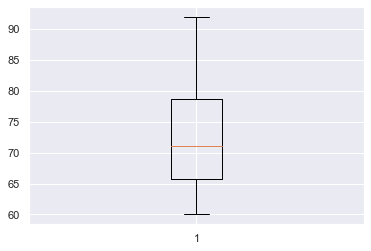

In [7]:
plt.boxplot(dt['Churn_out_rate']) #boxplot

<AxesSubplot:xlabel='Salary_hike', ylabel='Density'>

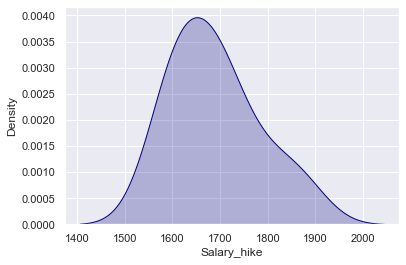

In [8]:
sns.kdeplot(data=dt,x= dt['Salary_hike'],fill=True,color="navy")

(array([2., 1., 2., 1., 1., 1., 0., 1., 0., 1.]),
 array([1580., 1609., 1638., 1667., 1696., 1725., 1754., 1783., 1812.,
        1841., 1870.]),
 <BarContainer object of 10 artists>)

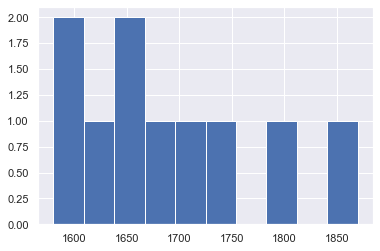

In [9]:
plt.hist(dt['Salary_hike']) #histogram

{'whiskers': [<matplotlib.lines.Line2D at 0x2ac1c040dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x2ac1c04f520>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ac1c040a60>],
 'medians': [<matplotlib.lines.Line2D at 0x2ac1c04fc40>],
 'fliers': [<matplotlib.lines.Line2D at 0x2ac1c04ffd0>],
 'means': []}

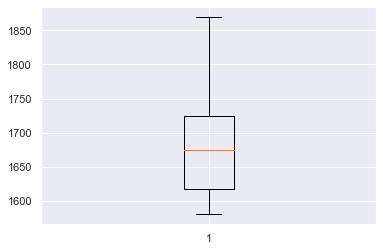

In [10]:
plt.boxplot(dt['Salary_hike']) #boxplot

### Bivariate

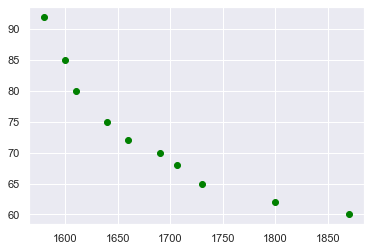

In [11]:
# Scatter plot
plt.scatter(x = dt['Salary_hike'], y = dt['Churn_out_rate'], color = 'green')


In [13]:
dt.columns

Index(['Salary_hike', 'Churn_out_rate'], dtype='object')

In [14]:
# correlation
np.corrcoef(dt['Churn_out_rate'], dt['Salary_hike']) 

array([[ 1.        , -0.91172162],
       [-0.91172162,  1.        ]])

In [15]:
# Covariance
# NumPy does not have a function to calculate the covariance between two variables directly. 
# Function for calculating a covariance matrix called cov() 
# By default, the cov() function will calculate the unbiased or sample covariance between the provided random variables.

cov_output = np.cov(dt['Churn_out_rate'], dt['Salary_hike'])[0, 1]
cov_output



-861.2666666666667

In [73]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#dt=scaler.fit_transform(dt)

In [16]:
dt

,Salary_hike,Churn_out_rate
0,1580,92
1,1600,85
2,1610,80
3,1640,75
4,1660,72
5,1690,70
6,1706,68
7,1730,65
8,1800,62
9,1870,60


In [17]:
# dt.cov()


# Import library
import statsmodels.formula.api as smf

# Simple Linear Regression
model = smf.ols('Churn_out_rate ~ Salary_hike', data = dt).fit()
model.summary()


c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Churn_out_rate   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     39.40
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           0.000239
Time:                        12:28:25   Log-Likelihood:                -28.046
No. Observations:                  10   AIC:                             60.09
Df Residuals:                       8   BIC:                             60.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     244.3649     27.352      8.934      0.000     181.291     307.439
Salary_hike    -0.1015      0.016     -6.277      0.000      -0.139      -0.064
==============================================================================
Omnibus:                        2.201   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.333   Jarque-Bera (JB):                1.408
Skew:                           0.851   Prob(JB):                        0.495
Kurtosis:                       2.304   Cond. No.                     3.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

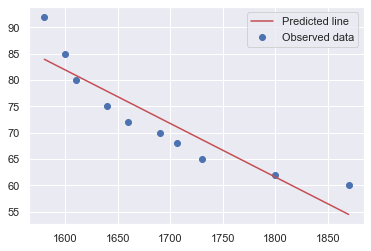

In [18]:
pred1 = model.predict(pd.DataFrame(dt['Salary_hike']))

# Regression Line
plt.scatter(dt.Salary_hike, dt.Churn_out_rate)
plt.plot(dt.Salary_hike, pred1, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

In [19]:
# Error calculation
res1 = dt.Churn_out_rate - pred1
res_sqr1 = res1 * res1
mse1 = np.mean(res_sqr1)
rmse1 = np.sqrt(mse1)
rmse1

3.9975284623377902

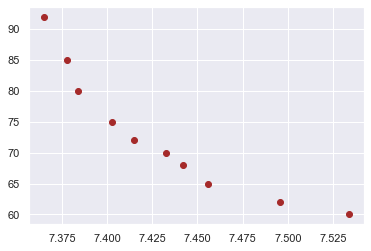

In [20]:
######### Model building on Transformed Data
# Log Transformation
# x = log(waist); y = at

plt.scatter(x = np.log(dt['Salary_hike']), y = dt['Churn_out_rate'], color = 'brown')

In [21]:
np.corrcoef(np.log(dt.Salary_hike), dt.Churn_out_rate) #correlation

array([[ 1.        , -0.92120773],
       [-0.92120773,  1.        ]])

In [22]:
model2 = smf.ols('Churn_out_rate ~ np.log(Salary_hike)', data = dt).fit()
model2.summary()

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Churn_out_rate   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     44.85
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           0.000153
Time:                        12:28:57   Log-Likelihood:                -27.502
No. Observations:                  10   AIC:                             59.00
Df Residuals:                       8   BIC:                             59.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1381.4562    195.402      7.070      0.000     930.858    1832.054
np.log(Salary_hike)  -176.1097     26.297     -6.697      0.000    -236.751    -115.468
==============================================================================
Omnibus:                        2.213   Durbin-Watson:                   0.571
Prob(Omnibus):                  0.331   Jarque-Bera (JB):                1.418
Skew:                           0.853   Prob(JB):                        0.492
Kurtosis:                       2.298   Cond. No.                     1.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

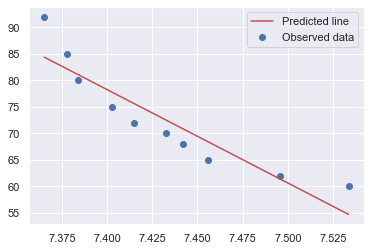

In [23]:
pred2 = model2.predict(pd.DataFrame(dt['Salary_hike']))

# Regression Line
plt.scatter(np.log(dt.Salary_hike), dt.Churn_out_rate)
plt.plot(np.log(dt.Salary_hike), pred2, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()


In [24]:
# Error calculation
res2 = dt.Churn_out_rate - pred2
res_sqr2 = res2 * res2
mse2 = np.mean(res_sqr2)
rmse2 = np.sqrt(mse2)
rmse2

3.7860036130228245

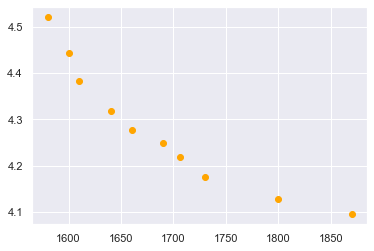

In [25]:
#### Exponential transformation
# x = waist; y = log(at)

plt.scatter(x = dt['Salary_hike'], y = np.log(dt['Churn_out_rate']), color = 'orange')

In [26]:
np.corrcoef(dt.Salary_hike, np.log(dt.Churn_out_rate)) #correlation

array([[ 1.        , -0.93463607],
       [-0.93463607,  1.        ]])

In [27]:
model3 = smf.ols('np.log(Churn_out_rate) ~ Salary_hike', data = dt).fit()
model3.summary()

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.log(Churn_out_rate)   R-squared:                       0.874
Model:                                OLS   Adj. R-squared:                  0.858
Method:                     Least Squares   F-statistic:                     55.26
Date:                    Tue, 19 Apr 2022   Prob (F-statistic):           7.38e-05
Time:                            12:29:18   Log-Likelihood:                 16.511
No. Observations:                      10   AIC:                            -29.02
Df Residuals:                           8   BIC:                            -28.42
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.6383      0.318     20.902      0.000       5.906       7.371
Salary_hike    -0.0014      0.000     -7.434      0.000      -0.002      -0.001
==============================================================================
Omnibus:                        1.935   Durbin-Watson:                   0.585
Prob(Omnibus):                  0.380   Jarque-Bera (JB):                1.314
Skew:                           0.780   Prob(JB):                        0.519
Kurtosis:                       2.152   Cond. No.                     3.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
pred3 = model3.predict(pd.DataFrame(dt['Salary_hike']))
pred3_at = np.exp(pred3)
pred3_at

0    84.107097
1    81.790758
2    80.656622
3    77.347701
4    75.217518
5    72.131736
6    70.538084
7    68.213379
8    61.861455
9    56.101012
dtype: float64

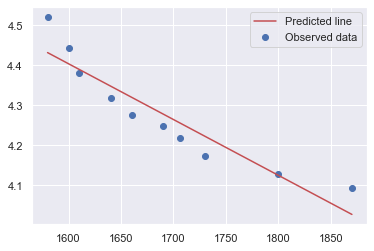

In [29]:
# Regression Line
plt.scatter(dt.Salary_hike, np.log(dt.Churn_out_rate))
plt.plot(dt.Salary_hike, pred3, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

In [30]:
# Error calculation
res3 = dt.Churn_out_rate - pred3_at
res_sqr3 = res3 * res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3

3.5415493188215934

In [31]:
#### Polynomial transformation
# x = waist; x^2 = waist*waist; y = log(at)

model4 = smf.ols('np.log(Churn_out_rate) ~ Salary_hike + I(Salary_hike*Salary_hike)', data = dt).fit()
model4.summary()

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.log(Churn_out_rate)   R-squared:                       0.984
Model:                                OLS   Adj. R-squared:                  0.979
Method:                     Least Squares   F-statistic:                     210.1
Date:                    Tue, 19 Apr 2022   Prob (F-statistic):           5.63e-07
Time:                            12:29:32   Log-Likelihood:                 26.728
No. Observations:                      10   AIC:                            -47.46
Df Residuals:                           7   BIC:                            -46.55
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       23.1762      2.415      9.597      0.000      17.466      28.887
Salary_hike                     -0.0207      0.003     -7.351      0.000      -0.027      -0.014
I(Salary_hike * Salary_hike)  5.605e-06   8.17e-07      6.857      0.000    3.67e-06    7.54e-06
==============================================================================
Omnibus:                        0.520   Durbin-Watson:                   1.272
Prob(Omnibus):                  0.771   Jarque-Bera (JB):                0.506
Skew:                          -0.088   Prob(JB):                        0.777
Kurtosis:                       1.913   Cond. No.                     1.10e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
pred4 = model4.predict(pd.DataFrame(dt))
pred4_at = np.exp(pred4)
pred4_at

0    89.470282
1    84.502725
2    82.261561
3    76.400595
4    73.135942
5    69.076991
6    67.282128
7    65.025854
8    61.079708
9    60.612686
dtype: float64

In [33]:
# Regression line
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X = dt.iloc[:, 0:1].values
X_poly = poly_reg.fit_transform(X)
# y = dt.iloc[:, 1].values

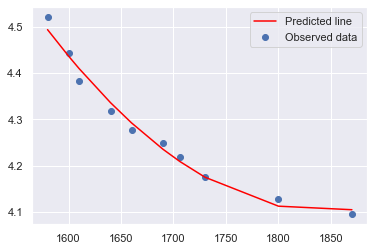

In [34]:
plt.scatter(dt.Salary_hike, np.log(dt.Churn_out_rate))
plt.plot(X, pred4, color = 'red')
plt.legend(['Predicted line', 'Observed data'])
plt.show()

In [35]:
# Error calculation
res4 = dt.Churn_out_rate - pred4_at
res_sqr4 = res4 * res4
mse4 = np.mean(res_sqr4)
rmse4 = np.sqrt(mse4)
rmse4

1.3267899683868878

In [36]:
# Choose the best model using RMSE
data = {"MODEL":pd.Series(["SLR", "Log model", "Exp model", "Poly model"]), "RMSE":pd.Series([rmse1, rmse2, rmse3, rmse4])}

table_rmse = pd.DataFrame(data)
table_rmse

,MODEL,RMSE
0,SLR,3.997528
1,Log model,3.786004
2,Exp model,3.541549
3,Poly model,1.326790


In [37]:
###################
# The best model

from sklearn.model_selection import train_test_split

train, test = train_test_split(dt, test_size = 0.2)

finalmodel = smf.ols('np.log(Churn_out_rate) ~ Salary_hike + I(Salary_hike*Salary_hike)', data = dt).fit()
finalmodel.summary()
# Simple Linear Regression



c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.log(Churn_out_rate)   R-squared:                       0.984
Model:                                OLS   Adj. R-squared:                  0.979
Method:                     Least Squares   F-statistic:                     210.1
Date:                    Tue, 19 Apr 2022   Prob (F-statistic):           5.63e-07
Time:                            12:31:01   Log-Likelihood:                 26.728
No. Observations:                      10   AIC:                            -47.46
Df Residuals:                           7   BIC:                            -46.55
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       23.1762      2.415      9.597      0.000      17.466      28.887
Salary_hike                     -0.0207      0.003     -7.351      0.000      -0.027      -0.014
I(Salary_hike * Salary_hike)  5.605e-06   8.17e-07      6.857      0.000    3.67e-06    7.54e-06
==============================================================================
Omnibus:                        0.520   Durbin-Watson:                   1.272
Prob(Omnibus):                  0.771   Jarque-Bera (JB):                0.506
Skew:                          -0.088   Prob(JB):                        0.777
Kurtosis:                       1.913   Cond. No.                     1.10e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
# Predict on test data
test_pred = finalmodel.predict(pd.DataFrame(test))
test_pred

2    4.409904
9    4.104504
dtype: float64

In [39]:
# Model Evaluation on Test data
test_res = test.Churn_out_rate - test_pred
test_sqrs = test_res * test_res
test_mse = np.mean(test_sqrs)
test_rmse = np.sqrt(test_mse)
test_rmse

66.47619526006315

In [40]:
# Prediction on train data
train_pred = finalmodel.predict(pd.DataFrame(train))
train_pred

3    4.335990
0    4.493907
5    4.235222
8    4.112180
1    4.436784
7    4.174785
4    4.292320
6    4.208895
dtype: float64

In [41]:
# Model Evaluation on train data
train_res = train.Churn_out_rate -train_pred
train_sqrs = train_res * train_res
train_mse = np.mean(train_sqrs)
train_rmse = np.sqrt(train_mse)
train_rmse



69.97365405594319